# Hetionet Drug Characterization

## Drug characterization using ChEBI

In [2]:
library("igraph")

In [3]:
rm(list = ls())

In [4]:
options(warn=-1)

### Creating the ontology graph

In [5]:
fileontology <- read.csv("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/chebi_ontologyChildParent.tab", sep = "\t", header = F)
edges <- fileontology[c(1,2)]
nodes<- as.data.frame(unique(c(unique(as.character(edges[, 1])), unique(as.character(edges[,2])))))
colnames(nodes) <- "node"
graph.full = graph.data.frame(edges, directed=T, vertices=nodes)
nodes_int = vcount(graph.full) # number of nodes
edges_int = ecount(graph.full) # number of edges
cat('Full graph counts:\n')
cat('Number of nodes:', nodes_int)
cat('\nNumber of edges:', edges_int)

graph <- igraph::simplify(graph.full)
nodes_int = vcount(graph)  
edges_int = ecount(graph)
cat('\n\nSimplified graph counts:')
cat('\nNumber of nodes:', nodes_int)
cat('\nNumber of edges:', edges_int)

Full graph counts:
Number of nodes: 102376
Number of edges: 152743

Simplified graph counts:
Number of nodes: 102376
Number of edges: 152743

### Input: parent classes

In [13]:
#fileparent <- read.csv("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/chebi_ontology1rstBranchParentsBiologicalRole.tab", sep = "\t", header = F)
fileparent <- read.csv("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/chebi_ontology1rstBranchParents.tab", sep = "\t", header = F)
parent <- fileparent[c(1)]
parent <- parent$V1
cat('\nNumber of parent classes:', length(unique(parent)))


Number of parent classes: 4

### Input: child classes

In [12]:
filechild <- read.csv("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/hetionet-chebids-list.tab", sep = "\t", header = F)
child <- filechild[c(1)]
child <- child$V1
cat('\nNumber of child classes:', length(unique(child)))
child <- intersect(child,nodes$node)
cat('\nNumber of child classes in DO:',length(unique(child)))


Number of child classes: 1071
Number of child classes in DO: 1035

### Output: child -> parent pathways 

In [14]:
resultsPathways  <- data.frame(t(rep(NA,3)))
colnames(resultsPathways ) <- c("child", "parent", "length")

### Algorithm

In [15]:
c <- 1  
l <- 0
for (node1 in child ){     
  for (node2 in parent){       
    sp <- get.shortest.paths(graph,from = node1, to = node2, mode = "out")
    
    if (length(sp$vpath[[1]]) > 0){
      l <- length(sp$vpath[[1]])
      resultsPathways[c, 1] <- node1
      resultsPathways[c, 2] <- node2      
      resultsPathways[c, 3] <- l # original row
      c<- c+1
    }
    cat('\nnode1:',node1,' node2:',node2, ' l:', l)  
  }
}


node1: CHEBI:5088  node2: CHEBI:23367  l: 8
node1: CHEBI:5088  node2: CHEBI:24433  l: 8
node1: CHEBI:5088  node2: CHEBI:33250  l: 8
node1: CHEBI:5088  node2: CHEBI:59999  l: 8
node1: CHEBI:10119  node2: CHEBI:23367  l: 7
node1: CHEBI:10119  node2: CHEBI:24433  l: 7
node1: CHEBI:10119  node2: CHEBI:33250  l: 7
node1: CHEBI:10119  node2: CHEBI:59999  l: 7
node1: CHEBI:71219  node2: CHEBI:23367  l: 8
node1: CHEBI:71219  node2: CHEBI:24433  l: 8
node1: CHEBI:71219  node2: CHEBI:33250  l: 8
node1: CHEBI:71219  node2: CHEBI:59999  l: 8
node1: CHEBI:17115  node2: CHEBI:23367  l: 9
node1: CHEBI:17115  node2: CHEBI:24433  l: 9
node1: CHEBI:17115  node2: CHEBI:33250  l: 9
node1: CHEBI:17115  node2: CHEBI:59999  l: 9
node1: CHEBI:2950  node2: CHEBI:23367  l: 9
node1: CHEBI:2950  node2: CHEBI:24433  l: 9
node1: CHEBI:2950  node2: CHEBI:33250  l: 9
node1: CHEBI:2950  node2: CHEBI:59999  l: 9
node1: CHEBI:60761  node2: CHEBI:23367  l: 7
node1: CHEBI:60761  node2: CHEBI:24433  l: 7
node1: CHEBI:6076

### Save results

In [16]:
str(resultsPathways)
write.csv(resultsPathways,"/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/hetionet-chebidsPathways.csv")

'data.frame':	1038 obs. of  3 variables:
 $ child : chr  "CHEBI:5088" "CHEBI:10119" "CHEBI:71219" "CHEBI:17115" ...
 $ parent: chr  "CHEBI:23367" "CHEBI:23367" "CHEBI:23367" "CHEBI:23367" ...
 $ length: int  8 7 8 9 9 7 10 9 9 7 ...


### Disease class distribution

In [17]:
hetioPathways <- resultsPathways
hetio.freq = table(sort(hetioPathways$parent))
hetio.freq.df = as.data.frame(hetio.freq)
colnames(hetio.freq.df)[1] = 'doid'
hetio.percent = prop.table(hetio.freq)*100
hetio.percent.df <- as.data.frame(hetio.percent)
colnames(hetio.percent.df) = c('doid', 'Percent')
colnames(fileparent) = c('doid','name')
hetio.percent.df.merge = merge(fileparent, hetio.freq.df, by.x = 'doid', all.x = T)
hetio.percent.df.merge$Freq[is.na(hetio.percent.df.merge$Freq)] = 0
hetio.percent.df.merge = merge(hetio.percent.df.merge, hetio.percent.df, by.x = 'doid', all.x = T)
hetio.percent.df.merge$Percent[is.na(hetio.percent.df.merge$Percent)] = 0
hetio.percent.df.merge = hetio.percent.df.merge[order(-hetio.percent.df.merge$Percent),]
hetio.percent.df.merge

,doid,name,Freq,Percent
1,CHEBI:23367,molecular entity,1019,98.1695568
4,CHEBI:59999,chemical substance,17,1.6377649
3,CHEBI:33250,atom,2,0.1926782
2,CHEBI:24433,group,0,0.0000000


### Save graphic

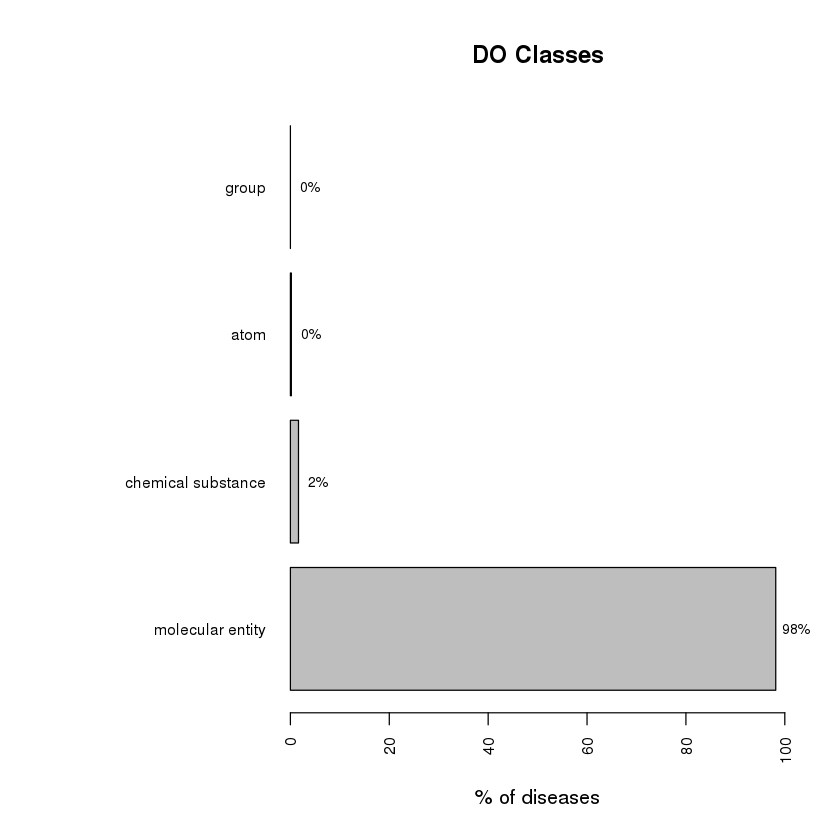

In [20]:
#png("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/hetionet-doids-classes-percent.png",width=1700,height=960, units = "px", pointsize = 18)
par(oma=c(.2,8.,.2,.2))
f1bp <- barplot(hetio.percent.df.merge$Percent, names.arg = hetio.percent.df.merge$name,las=2,cex.names=.8,xlim=c(0,100),main="DO Classes",xlab="% of diseases",cex.axis=.8,horiz=T)
text(hetio.percent.df.merge$Percent+4,f1bp,labels=paste0(as.character(round(hetio.percent.df.merge$Percent)),"%"),cex=.7,xpd=T)
#dev.off()

### DO coverage

### Input: all DO classes as child classes

In [21]:
filechild <- read.csv("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/allActIdDOOntology.tab", sep = "\t", header = F)
child <- filechild[c(1)]
child <- child$V1
cat('\nNumber of child classes:', length(unique(child)))
child <- intersect(child,nodes$node)
cat('\nNumber of child classes in DO:',length(unique(child)))


Number of child classes: 6931
Number of child classes in DO: 0

### Output: child -> parent pathways

In [59]:
resultsPathways  <- data.frame(t(rep(NA,3)))
colnames(resultsPathways ) <- c("child", "parent", "length")

### Algorithm

In [60]:
c <- 1  
for (node1 in child ){     
  for (node2 in parent){       
    sp <- get.shortest.paths(graph,from = node1, to = node2, mode = "out")
    
    if (length(sp$vpath[[1]]) > 0){
      l <- length(sp$vpath[[1]])
      resultsPathways[c, 1] <- node1
      resultsPathways[c, 2] <- node2      
      resultsPathways[c, 3] <- l # original row
      c<- c+1
    }
  }
}

### Save results

In [61]:
str(resultsPathways)
write.csv(resultsPathways,"/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/hetionet-doOntologyChildsPathways.csv")

'data.frame':	6956 obs. of  3 variables:
 $ child : chr  "DOID:3127" "DOID:3121" "DOID:3120" "DOID:3122" ...
 $ parent: chr  "DOID:7" "DOID:14566" "DOID:14566" "DOID:7" ...
 $ length: int  5 6 7 4 5 7 7 5 7 6 ...


### Disease class distribution and DO coverage

In [62]:
doPathways <- resultsPathways
do.freq = table(sort(doPathways$parent))
do.df = as.data.frame(do.freq)
hetio.df = as.data.frame(hetio.freq)
colnames(do.df) = c('doid', 'doFreq'); colnames(hetio.df) = c('doid', 'hetioFreq')
hetio.parent.df = merge(fileparent, hetio.df, by.x = 'doid', all.x = T) #; hetio.parent.df
hetio.parent.df$hetioFreq[is.na(hetio.parent.df$hetioFreq)] = 0 #; hetio.parent.df
coverage.df = merge(hetio.parent.df, do.df, by.x = 'doid', all.x = T) #; coverage.df
coverage.df$percent = (coverage.df$hetioFreq*100)/coverage.df$doFreq #; coverage.df
coverage.df = coverage.df[order(-coverage.df$percent),]; coverage.df

,doid,name,hetioFreq,doFreq,percent
5,DOID:150,disease of mental health,11,228,4.824561
3,DOID:0080015,physical disorder,1,33,3.030303
4,DOID:14566,disease of cellular proliferation,56,2611,2.144772
6,DOID:225,syndrome,2,100,2.000000
8,DOID:7,disease of anatomical entity,57,2952,1.930894
1,DOID:0014667,disease of metabolism,5,321,1.557632
2,DOID:0050117,disease by infectious agent,4,434,0.921659
7,DOID:630,genetic disease,0,277,0.000000


### Save graphic

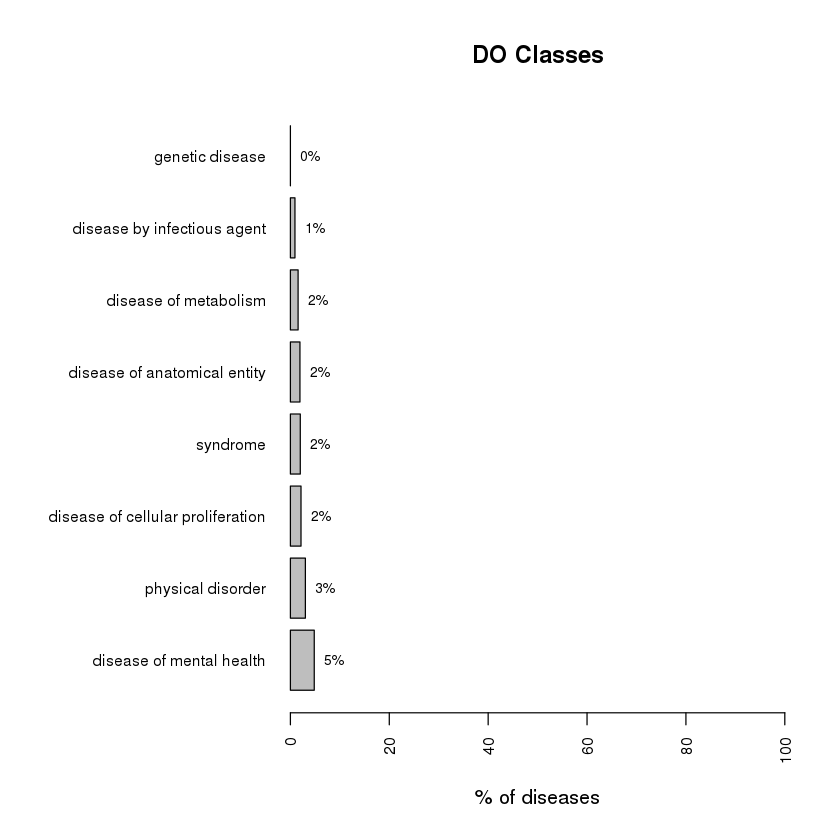

In [63]:
#png("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/Characterization-Disease-Drug-Scope-of-hetio/out/hetionet-do-coverage-classes-percent.png",width=1700,height=960, units = "px", pointsize = 18)
par(oma=c(.2,8.,.2,.2))
f1bp <- barplot(coverage.df$percent, names.arg = coverage.df$name,las=2,cex.names=.8,xlim=c(0,100),main="DO Classes",xlab="% of diseases",cex.axis=.8,horiz=T)
text(coverage.df$percent+4,f1bp,labels=paste0(as.character(round(coverage.df$percent)),"%"),cex=.7,xpd=T)
#dev.off()